# Оценка сложности сверху алгоритма Евклида

Алгоритм Евклида служит для нахождение НОД (наибольшего общего делителя). Он сводится к рекурентному делению с остатком.

    a = q * b + r
    if b > r: a = b; b = r; else: a = r; b = b
    
## Мои аналитические результаты

В аналитических выкладках я нашел сходство алгоритма Евклида с числами Фибоначчи и получил сложность `ln(n)`. Сходство появляется после предположения, что худшим случаем является, когда `q = 1` на каждой итерации. Тогда формула приобретает вид чисел Фибоначчи с измененными начальными условиями.

Точная оценка. Для натуральных чисел `m < n` оценка сложности сверху: 

    f(n) = с1 + 1 + с2 * ln(n)
    c1 = log_fi_sqrt5
    c2 = 1 / ln_fi
    fi = (1 + sqrt5) / 2
    
## Задачи в iPython

1. Провести случайный эксперимент, задав n и выбрав случайный m. Исследовать худшие случаи сложности. Провести на нескольких n
2. Построить фактическую зависимость f(n) на определенном промежутке. Сравнить с теоретической. 

## Результаты

1. Предположение о худшем случае, когда все коэффициенты деления равны 1, оказалось **верным**. Единственное, можно говорить только об асимптотическом стремлении. См [график](#ancor2)
2. Построен [график](#ancor) сравнения аналитической формулы оценки и эксперимента. Выведенная оценка работает достаточно **хорошо**. Однозначно правильно определена форма (lnN), что касается абсолютных значений, то на промежутке 10^3 - 10^5 оценка завышена на ~25%

## Код

In [1]:
from __future__ import division

from math import log, sqrt

import numpy as np
import scipy

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from pylab import rcParams
rcParams['figure.figsize'] = 10, 5

### Алгоритм Евклида

In [2]:
def evklid(a, b): 
    counter = 0
    if b > a: a, b = b, a
    q = []
    while b > 0:
        q.append(a // b)
        r = a % b
        if b > r:
            a, b = b, r 
        else:
            a, b = r, b
        counter += 1
    return a, counter, q


Тестируем

In [3]:
print evklid(15, 20)
print evklid(5, 7)
print evklid(2*3*5*7, 2*3*11*13)

(5, 2, [1, 3])
(1, 3, [1, 2, 2])
(6, 4, [4, 11, 1, 2])


### Наша оценка

In [4]:
fi = (1 + sqrt(5))/2
c1 = log(sqrt(5), fi)
c2 = 1/log(fi)
print fi
print c1
print c2

def estimate(n):
    return c1 + 1 + c2 * log(n)

estimate = np.vectorize(estimate)

print estimate(1000)
print estimate(20000)

1.61803398875
1.67227593818
2.07808692124
17.0271918385
23.2525838957


### 1. Исследование худших случаев
#### 1.1. Исследуем распределение сложности f(n, m)

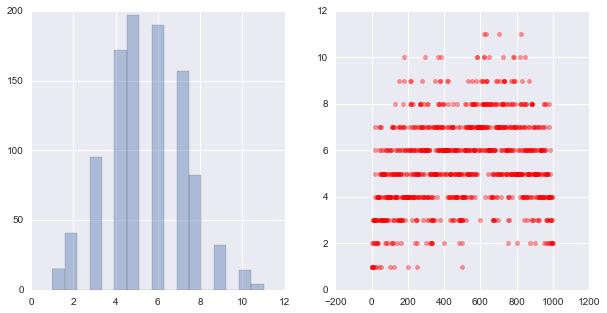

In [5]:
n = 1000
m = range(1, 1000)
operations = []
coefs = []
for i in m:
    res, op, q = evklid(n, i)
    operations.append(op)
    coefs.append(q)

plt.subplot(1, 2, 1)
sns.distplot(operations, kde=False, rug=False)
plt.subplot(1, 2, 2)
plt.scatter(m, operations, color='r', alpha=.4)

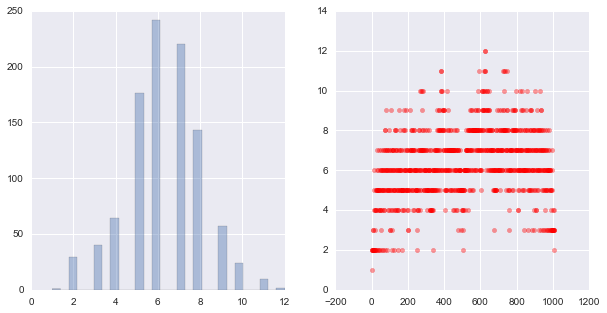

In [7]:
n = 1009
m = range(1, 1009)
operations = []
coefs = []
for i in m:
    res, op, q = evklid(n, i)
    operations.append(op)
    coefs.append(q)

plt.subplot(1, 2, 1)
sns.distplot(operations, kde=False, rug=False)
plt.subplot(1, 2, 2)
plt.scatter(m, operations, color='r', alpha=.4)

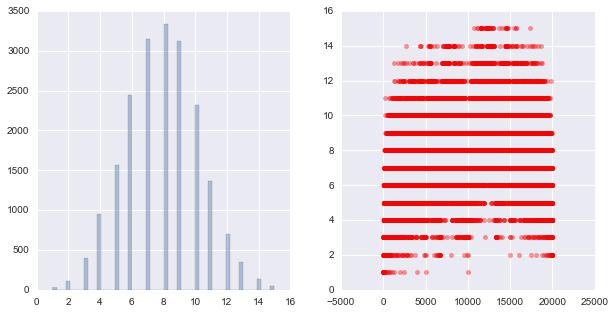

In [8]:
n = 20000
m = range(1, 20000)
operations = []
coefs = []
for i in m:
    res, op, q = evklid(n, i)
    operations.append(op)
    coefs.append(q)

plt.subplot(1, 2, 1)
sns.distplot(operations, kde=False, rug=False)
plt.subplot(1, 2, 2)
plt.scatter(m, operations, color='r', alpha=.4)

**Вывод**: Распределение f(n,m) похожи друг на друга при различных m

#### 1.2 Исследуем худшие случаи - посмотрим на коэффициенты q

In [9]:
n = 1000
m = range(1, 1000)
operations = []
coefs = []
for i in m:
    res, op, q = evklid(n, i)
    operations.append(op)
    coefs.append(q)

operations = np.array(operations)
args = np.argsort(operations)[::-1][:10]
coefs = [coefs[i] for i in args]
coefs

[[1, 4, 1, 1, 1, 1, 1, 1, 1, 1, 2],
 [1, 1, 1, 2, 1, 1, 1, 2, 1, 2, 3],
 [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 5],
 [1, 2, 2, 1, 2, 1, 1, 1, 2, 1, 2],
 [1, 1, 1, 1, 1, 3, 3, 1, 1, 4],
 [1, 1, 1, 5, 1, 1, 1, 1, 1, 6],
 [1, 3, 1, 2, 3, 1, 1, 1, 1, 3],
 [1, 1, 2, 1, 1, 4, 1, 1, 1, 2],
 [2, 1, 2, 1, 1, 1, 2, 1, 2, 3],
 [1, 1, 2, 1, 1, 2, 2, 1, 1, 5]]

**Выводы**: В целом, наша гипотеза о худших случаях правильна. Конечно, в реальности всех единиц может никогда и не быть, но это будет чем-то вроде асимптоты.

Будем отслеживать средний коэффициент деления

In [10]:
def coefs_mean(coef_list):
    return sum(coef_list) / len(coef_list)

In [11]:
[coefs_mean(c) for c in coefs]

[1.3636363636363635,
 1.4545454545454546,
 1.3636363636363635,
 1.4545454545454546,
 1.7,
 1.9,
 1.7,
 1.5,
 1.6,
 1.7]

### 2. Построение фактической зависимости f(n)

In [12]:
def apply_evklid(n): # n as a number
    m = range(1, n)
    operations = []
    coefs = []
    for i in m:
        res, op, q = evklid(n, i)
        operations.append(op)
        coefs.append(q)
    arg = np.argmax(operations)
    operations = np.max(operations)
    coef = coefs_mean(coefs[arg])
    return operations, coef
    
apply_evklid = np.vectorize(apply_evklid) # n becomes a np.array     

In [13]:
n = np.linspace(1000, 100000, num=100, dtype=np.uint32)
operations, coefs = apply_evklid(n)

Самый важный график <a id="ancor"></a> - сравнение аналитической оценки и эксперимента

(0, 120000.0)

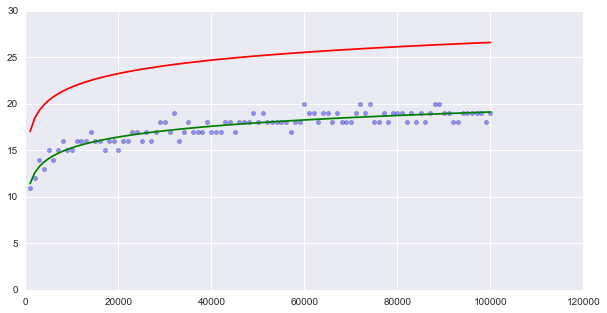

In [14]:
plt.figure()
plt.scatter(n, operations, alpha=.4)
regr = scipy.stats.linregress(np.log(n), operations)
oper_regr = regr[0] * np.log(n) + regr[1]
plt.plot(n, oper_regr, color='g')
oper_est = estimate(n)
plt.plot(n, oper_est, color='r')
plt.gca().set_ylim([0, 30])
plt.gca().set_xlim(left=0)

Коэффициенты деления находятся близко от **1** <a id="ancor2"></a>

(0, 120000.0)

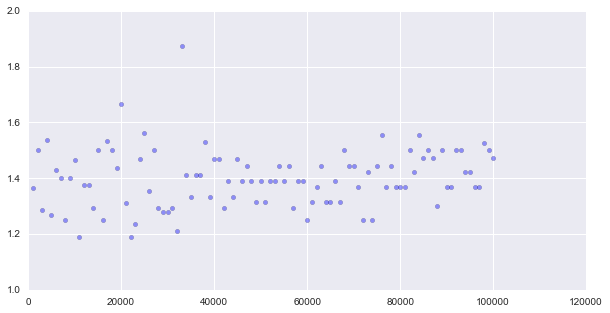

In [15]:
plt.figure()
plt.scatter(n, coefs, alpha=.4)
plt.gca().set_ylim([1, 2])
plt.gca().set_xlim(left=0)